## Load libraries

In [13]:
import json
import numpy as np
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from companionCode.wrangling.parse import df_from_bib
from companionCode.visualization.categorical_plots import *
from matplotlib_venn import venn2


## Visualization options

In [96]:
# custom colors
base_c="#6A94D5"
comp_c="#D5AB6A"
tri_1_c="#D56A94"
tri_2_c="#94D56A"
tet_1_c="#D56ACA"
tet_2_c="#D5AB6A"
tet_3_c="#6AD575"
# font option
matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = "11"

## Population of abstracts included in top-tier mangement journals

### Read data

In [2]:
# load the json file with the details of management studies' abstracts
with open("data/management_studies_abstracts.json", "r") as pipe:
    all_abstracts = json.load(pipe)
# source data
df = pd.read_csv(all_abstracts["location"])


/Users/sbbk475/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Screen for studies mentioning jolts or shocks

In [92]:
# keywords
keywords = [
    "shock",
    "exogenous shock",
    "jolt",
    "environmental jolt",
]
# tag items
for keyword in keywords:
    df.loc[:, keyword] = False
    df.loc[df["Abstract"].str.lower().str.contains(keyword), keyword] = True
    df.loc[df["Title"].str.lower().str.contains(keyword), keyword] = True


### Abstract including 'jolt'

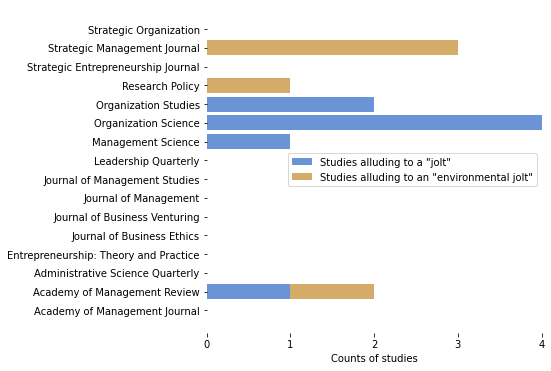

In [85]:
# "jolt" occurrences
# data prep
# --+ order data
df.sort_values(["Source title", "Year"], inplace=True)
# encode journal names
le = preprocessing.LabelEncoder()
le.fit(df["Source title"].unique())
# --+ counts of studies by type of shock
# ----+ jolt
gr = df.loc[(df["jolt"] == 1) & (df["environmental jolt"] == False)].groupby(
    ["Source title"], as_index=False
)
jolt = pd.DataFrame(gr.size())
# ----+ environmental jolt
gr = df.loc[(df["jolt"] == 1) & (df["environmental jolt"] == True)].groupby(
    ["Source title"], as_index=False
)
env_jolt = pd.DataFrame(gr.size())
# ----+ data to pass to the chart
data = pd.DataFrame({"Source title": le.classes_},)
data = pd.merge(data, jolt, on="Source title", how="left")
data = pd.merge(data, env_jolt, on="Source title", how="left")
data.fillna(0, inplace=True)
# create stacked bar chart
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(data.index, data["size_x"], label='Studies alluding to a "jolt"', color=base)
ax.barh(
    data.index,
    width=data["size_y"],
    left=data["size_x"],
    label='Studies alluding to an "environmental jolt"',
    color=comp,
)
# labels and ticks
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel("Counts of studies")
ax.set_ylabel("")
ax.set_yticks(data.index)
ax.set_yticklabels(le.classes_)
# hide the right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
# legend
ax.legend(loc="best")
# plot
plt.show()


### Abstracts including 'shock'

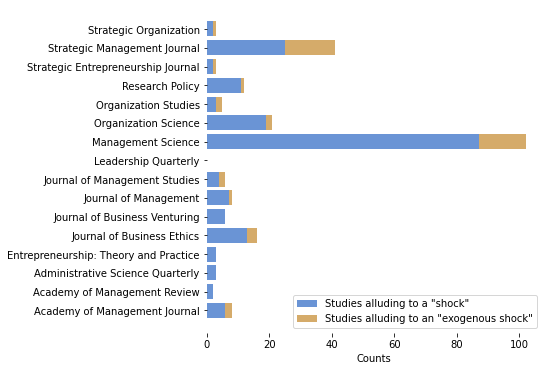

In [86]:
# data prep
# --+ order data
df.sort_values(["Source title", "Year"], inplace=True)
# encode journal names
le = preprocessing.LabelEncoder()
le.fit(df["Source title"].unique())
# --+ counts of studies by type of shock
# ----+ non exogenous shock
gr = df.loc[(df["shock"] == 1) & (df["exogenous shock"] == False)].groupby(
    ["Source title"], as_index=False
)
shock = pd.DataFrame(gr.size())
# ----+ exogenous shock
gr = df.loc[(df["shock"] == 1) & (df["exogenous shock"] == True)].groupby(
    ["Source title"], as_index=False
)
ex_shock = pd.DataFrame(gr.size())
# ----+ data to pass to the chart
data = pd.DataFrame({"Source title": le.classes_},)
data = pd.merge(data, shock, on="Source title", how="left")
data = pd.merge(data, ex_shock, on="Source title", how="left")
data.fillna(0, inplace=True)
# create stacked bar chart
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(data.index, data["size_x"], label='Studies alluding to a "shock"', color=base)
ax.barh(
    data.index,
    width=data["size_y"],
    left=data["size_x"],
    label='Studies alluding to an "exogenous shock"',
    color=comp,
)
# labels and ticks
ax.set_xlabel("Counts")
ax.set_ylabel("")
ax.set_yticks(data.index)
ax.set_yticklabels(le.classes_)
# hide the right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
# legend
ax.legend(loc="best")
# plot
plt.show()


### Inter-temporal distribution of abstracts regarding candidate studies

#### 'Jolt' or 'exogenous shock'

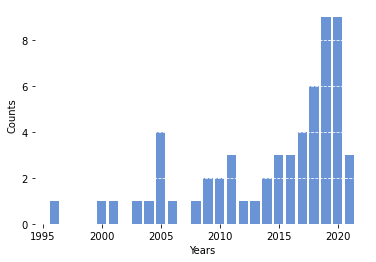

In [87]:
# data prep
df.loc[:, "exogenous shock or jolt"] = df["exogenous shock"] + df["jolt"]
gr = df.loc[df["Year"] > 1995].groupby("Year")
data = gr["exogenous shock or jolt"].agg(np.sum)
# bar chart
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
plt.bar(x=data.keys(), height=data.values, color=base)
# plt.plot(data.keys(), data.values, color="firebrick", marker="o", markeredgecolor="white")
# labels and ticks
ax.set_xlabel("Years")
ax.set_ylabel("Counts")
# hide the right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
# grid
ax.grid(axis="y", color="white", linestyle="--")
# show plot
plt.show()


#### 'Jolt' or 'shock'

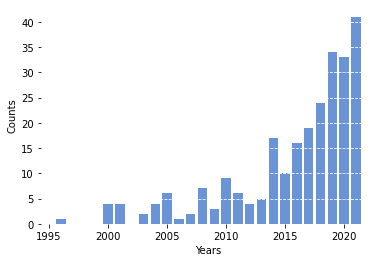

In [88]:
# data prep
df.loc[:, "shock or jolt"] = df["shock"] + df["jolt"]
gr = df.loc[df["Year"] > 1995].groupby("Year")
data = gr["shock or jolt"].agg(np.sum)
# bar chart
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
plt.bar(x=data.keys(), height=data.values, color=base)
# plt.plot(data.keys(), data.values, color="firebrick", marker="o", markeredgecolor="white")
# labels and ticks
ax.set_xlabel("Years")
ax.set_ylabel("Counts")
# hide the right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
# grid
ax.grid(axis="y", color="white", linestyle="--")
# show plot
plt.show()


## Management articles dealing with exogenous shocks

### Read data

In [4]:
# articles including "exogenous shock" in title, abstract, and/or keywords
df = df_from_bib("data/management_studies_on_ex_shocks.bib")


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 0
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      49 non-null     object
 1   journal  49 non-null     object
 2   year     49 non-null     int64 
 3   author   49 non-null     object
 4   title    49 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.3+ KB


In [6]:
# sort values (for data viz purposes)
df.sort_values(["journal", "year"], inplace=True)


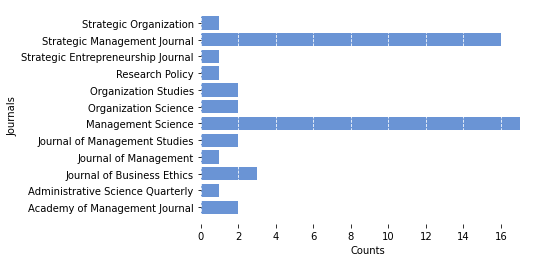

In [10]:
# data prep
gr = df.loc[df["year"] > 1995].groupby("journal")
data = gr["key"].agg(np.count_nonzero)
# bar chart
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
plt.barh(y=data.keys(), width=data.values, color=base_c)
# plt.plot(data.keys(), data.values, color="firebrick", marker="o", markeredgecolor="white")
# labels and ticks
ax.set_xlabel("Counts")
ax.set_ylabel("Journals")
# hide the right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
# grid
ax.grid(axis="x", color="white", linestyle="--")
# show plot
plt.show()


In [12]:
df.loc[:, ["author", "year", "journal"]]


,author,year,journal
0,"Vergne, J.-P.",2012,Academy of Management Journal
0,"Gupta, V.K. and Mortal, S. and Chakrabarty, B....",2020,Academy of Management Journal
0,"Uzzi, B.",1997,Administrative Science Quarterly
0,"Cai, J. and Shi, G.",2019,Journal of Business Ethics
0,"Hilary, G. and Huang, S.",2021,Journal of Business Ethics
0,"Seebeck, A. and Vetter, J.",2021,Journal of Business Ethics
0,"Micelotta, E. and Lounsbury, M. and Greenwood, R.",2017,Journal of Management
0,"Glynn, M.A. and Lounsbury, M.",2005,Journal of Management Studies
0,"Jenkins, M.",2010,Journal of Management Studies
0,"Hsu, J. and Wang, X.-M. and Wu, C.",1998,Management Science


## Scopus search outcome and coding outcome

### Read data

In [7]:
# Scopus's search outcome
df0 = df_from_bib("data/management_studies_on_ex_shocks_clean.bib")
# coded data
df1 = pd.read_csv("data/coded_studies.csv")
# merge data
df = pd.merge(df0, df1.loc[df1["sample"] == True], on="key", how="inner")
del df0, df1


### Sample description

#### Distribution of studies across journals

In [97]:
chart = BarChart(name_="studies_over_time")
chart.add_data(df_=df, var_="journal")
chart.plot(
    fig_size=(3.75, 2.5),
    use_tex=True,
    color_=base_c,
    tick_min=0,
    tick_step=2,
    axis_label="Counts of studies",
    horizontal_=True,
)




                  PGF is a non-GUI backend -- nothing to display here!
                  
                  To display the chart here, set 'use_tex' = False 
                  


### Type of naturally-occurring event

In [98]:
chart = BarChart(name_="classes_of_events")
chart.add_data(df_=df, var_="event_class")
chart.plot(
    fig_size=(3.75, 3.5),
    use_tex=True,
    color_=base_c,
    tick_min=0,
    tick_step=2,
    axis_label="Counts of studies",
    horizontal_=True,
)



                  PGF is a non-GUI backend -- nothing to display here!
                  
                  To display the chart here, set 'use_tex' = False 
                  


### Event-research question mapping

In [99]:
# get cross tab
cross_tab = pd.crosstab(df["role_empirical"], df["role_theory"])
# create figure
fig = plt.figure(figsize=(2, 2))
ax = fig.add_subplot(1, 1, 1)
venn2(
    subsets=(cross_tab[0][1], cross_tab[1][0], cross_tab[1][1]),
    set_labels=("Empirical role", "Substantive role"),
    set_colors=(base_c, comp_c),
    alpha=0.7,
)
plt.savefig("event_roles.pgf", bbox_inches="tight", pad_inches=0)


### Potential outcome framework

In [33]:
# data
# --+ event plays empirical role
gr = df.loc[(df["role_empirical"] == True) & (df["role_theory"] == False)].groupby(
    ["control_group"], as_index=False
)
c0 = pd.DataFrame(gr.size())
# --+ event plays substantive role
gr = df.loc[(df["role_empirical"] == False) & (df["role_theory"] == True)].groupby(
    ["control_group"], as_index=False
)
c1 = pd.DataFrame(gr.size())
# --+ event plays both roles
gr = df.loc[(df["role_empirical"] == True) & (df["role_theory"] == True)].groupby(
    ["control_group"], as_index=False
)
c2 = pd.DataFrame(gr.size())


In [100]:
# create stacked bar chart
fig = plt.figure(figsize=(2.5, 0.9))
ax = fig.add_subplot(1, 1, 1)
ax.barh(
    c0.index,
    c0["size"],
    height=0.25,
    label="Empirical",
    color=base_c,
    alpha=1,
    edgecolor=base_c,
)
ax.barh(
    c1.index,
    c1["size"],
    height=0.25,
    left=c0["size"],
    label="Substantive",
    color=base_c,
    alpha=0.6,
    edgecolor=base_c,
)
ax.barh(
    c2.index,
    c2["size"],
    left=c0["size"] + c1["size"],
    height=0.25,
    label="Empirical \& substantive",
    color=base_c,
    alpha=0.3,
    edgecolor=base_c,
)
# labels and ticks
ax.set_yticks([0, 1])
ax.set_yticklabels(["Design lacking a control group", "Design with a control group"])
ax.set_xlabel("Counts of studies")
# hide the right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
# legend
ax.legend(loc=(1, 0), frameon=False)
# tick labels' jsutification
plt.setp(
    ax.get_yticklabels(), rotation=0, ha="right", va="center", rotation_mode="anchor",
)
# plot
plt.savefig("potential_outcome.pgf", bbox_inches="tight", pad_inches=0)
